In [1]:
import pandas as pd 
import mlxtend
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

import matplotlib.pyplot as plt 
import seaborn as sns

## Load and check the dataset

In [2]:
movie = pd.read_csv('my_movies.csv')
movie.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


## EDA and Pre processing

In [3]:
movie.shape

(10, 15)

In [4]:
movie['V1'].value_counts()

Gladiator        6
Sixth Sense      2
LOTR1            1
Harry Potter1    1
Name: V1, dtype: int64

In [5]:
movie['V2'].value_counts()

Patriot          6
LOTR1            1
LOTR2            1
Harry Potter2    1
LOTR             1
Name: V2, dtype: int64

In [6]:
movie['V3'].value_counts()

Sixth Sense      4
Harry Potter1    1
Braveheart       1
Gladiator        1
Name: V3, dtype: int64

In [7]:
movie['V4'].value_counts()

Green Mile    2
Name: V4, dtype: int64

In [8]:
df = movie.iloc[:,5:15]
df

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


In [9]:
for i in range(len(df.columns)):
    print(f"{df.columns[i]} : {df[df.columns[i]].value_counts()[1]}")

Sixth Sense : 6
Gladiator : 7
LOTR1 : 2
Harry Potter1 : 2
Patriot : 6
LOTR2 : 2
Harry Potter2 : 1
LOTR : 1
Braveheart : 1
Green Mile : 2


## Apriori Algorithm
#### min_supports = [0.01,0.03,0.05] 
#### min_threshold = [0.5,0.8,0.9]
#### metric = "lift"  (lift > 1)  

In [10]:
min_supports = [0.01,0.03,0.05,0.1]
min_thresholds = [0.5,0.8,0.9]
for i in range(len(min_supports)):
    frequent_itemsets = apriori(df, min_support=min_supports[i], use_colnames=True)
    for j in range(len(min_thresholds)):
        rules = association_rules(frequent_itemsets, metric="lift", min_threshold=min_thresholds[j]) 
        print(f"{[min_supports[i],min_thresholds[j]]} : {rules[rules.lift>1].shape[0]} rules")

[0.01, 0.5] : 236 rules
[0.01, 0.8] : 236 rules
[0.01, 0.9] : 236 rules
[0.03, 0.5] : 236 rules
[0.03, 0.8] : 236 rules
[0.03, 0.9] : 236 rules
[0.05, 0.5] : 236 rules
[0.05, 0.8] : 236 rules
[0.05, 0.9] : 236 rules
[0.1, 0.5] : 236 rules
[0.1, 0.8] : 236 rules
[0.1, 0.9] : 236 rules


C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types resu

### here with different combinaion of support and confidence giving same no. of rules i.e. 236rules

### Rules with lift > 1, min_support = 0.05, and min_threshold = 0.8

In [11]:
df.head()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0


In [12]:
df = df.rename({'Sixth Sense': 'SixthSense', 'Harry Potter1': 'HarryPotter1', 'Harry Potter2': 'HarryPotter2', 'Green Mile': 'GreenMile'}, axis=1) 
df.columns

Index(['SixthSense', 'Gladiator', 'LOTR1', 'HarryPotter1', 'Patriot', 'LOTR2',
       'HarryPotter2', 'LOTR', 'Braveheart', 'GreenMile'],
      dtype='object')

In [122]:
itemsets = apriori(df, min_support=0.05, use_colnames=True) # min_support is support
rules = association_rules(itemsets, metric="lift", min_threshold=0.8) # min_threshold is confidence
rules.sort_values('lift', ascending=False)[0:5]

C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
209,"(LOTR2, GreenMile)","(LOTR1, HarryPotter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0
104,"(Gladiator, GreenMile)",(LOTR),0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0
165,"(LOTR1, GreenMile)","(SixthSense, HarryPotter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0
208,"(LOTR1, HarryPotter1)","(LOTR2, GreenMile)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0
207,"(LOTR1, GreenMile)","(LOTR2, HarryPotter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0


## Visualization

### Scatter plot

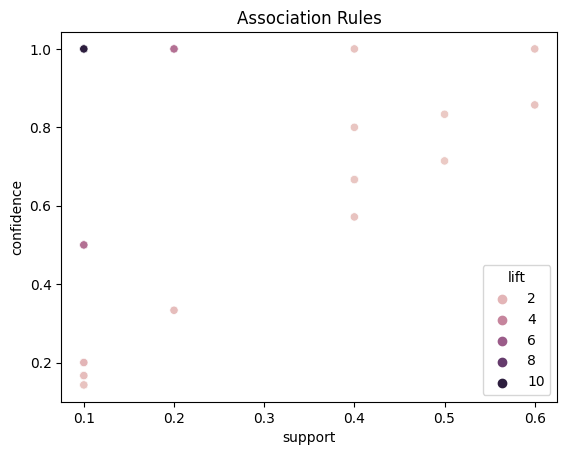

In [123]:
sns.scatterplot(data=rules, x='support', y='confidence', hue='lift')
plt.title('Association Rules')
plt.show()

### Heatmap

In [143]:
itemsets_df = itemsets
itemsets_df = itemsets_df.sort_values('support', ascending=False)[0:20]
itemsets_df = itemsets_df.set_index('itemsets').T
itemsets_df

itemsets,(Gladiator),(SixthSense),(Patriot),"(Gladiator, Patriot)","(SixthSense, Gladiator)","(SixthSense, Gladiator, Patriot)","(SixthSense, Patriot)",(GreenMile),"(LOTR1, LOTR2)","(SixthSense, GreenMile)",(LOTR1),(HarryPotter1),(LOTR2),"(LOTR1, SixthSense, GreenMile, LOTR2)","(LOTR1, SixthSense, GreenMile, HarryPotter1)","(LOTR1, SixthSense, GreenMile)","(SixthSense, HarryPotter1, LOTR2)","(SixthSense, GreenMile, HarryPotter1)","(SixthSense, GreenMile, LOTR2)","(LOTR, SixthSense, GreenMile)"
support,0.7,0.6,0.6,0.6,0.5,0.4,0.4,0.2,0.2,0.2,0.2,0.2,0.2,0.1,0.1,0.1,0.1,0.1,0.1,0.1


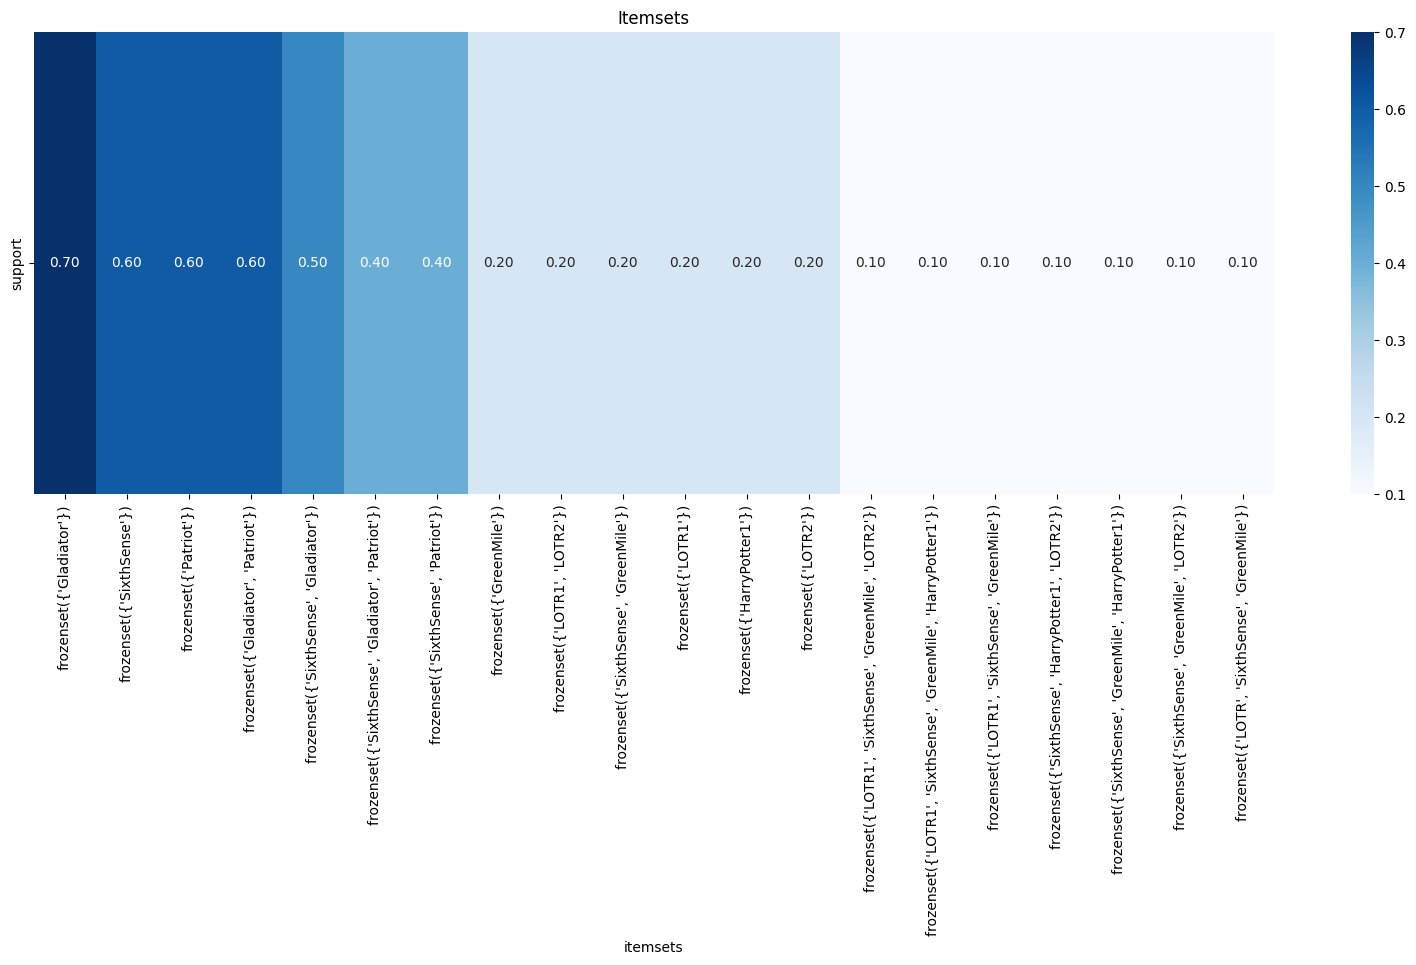

In [146]:
plt.figure(figsize=(20,6))
sns.heatmap(itemsets_df, cmap='Blues', annot=True, fmt='.2f')
plt.title('Itemsets')
plt.show()

### Network graph

In [ ]:
#import networkx as nx


#G = nx.DiGraph()
#for i, row in rules.iterrows():
    #G.add_edge(row['antecedents'], row['consequents'], weight=row['lift'])

#pos = nx.spring_layout(G, k=0.3, iterations=50)
#nx.draw_networkx_nodes(G, pos, node_size=2000, node_color='lightblue')
#nx.draw_networkx_edges(G, pos, width=rules['lift']*4)
#nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')
#plt.axis('off')

### Bar chart

In [ ]:
#rules['lift_new'] = pd.cut(rules['lift'],bins=[0.8,1.0,1.6,2.0,2.5,5.0,10.0,11.0],labels=[0.8,1.0,1.5,2.0,2.5,5.0,10.0])
#rules_df = rules.sort_values('lift', ascending=False)

#plt.figure(figsize=(10,6))
#sns.barplot(data=rules_df, x='consequents', y='support', hue='lift_new', dodge=False)
#plt.xticks(rotation=90)
#plt.title('Association Rules')
